In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed) 

scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [3]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed, shuffle=True)

32
64
128
256
512


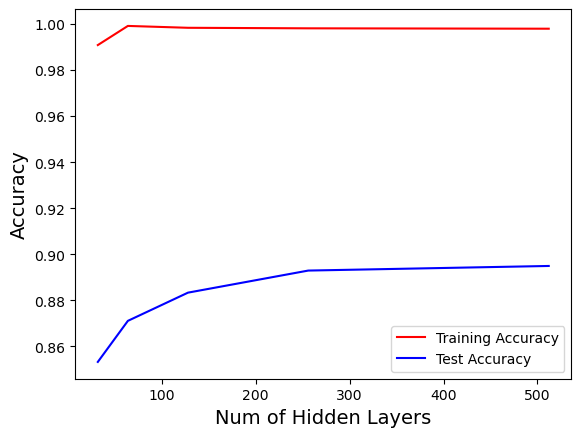

In [13]:
hidden_layers = [32, 64, 128, 256, 512]

fig, axes = plt.subplots()
axes.set_xlabel('Num of Hidden Layers', fontsize=14)
axes.set_ylabel('Accuracy', fontsize=14)

train_acc = []
test_acc = []

for i in hidden_layers:
    print(i)
    mlp = MLPClassifier(hidden_layer_sizes=(i,), random_state=seed, max_iter=1000)
    mlp.fit(X_tr, y_tr)
    train_acc.append(mlp.score(X_tr, y_tr))
    test_acc.append(mlp.score(X_val, y_val))


axes.plot(hidden_layers, train_acc, label='Training Accuracy', color='red') 
axes.plot(hidden_layers, test_acc, label='Test Accuracy', color='blue')
leg = axes.legend()


0.001
0.01
0.1
1
10


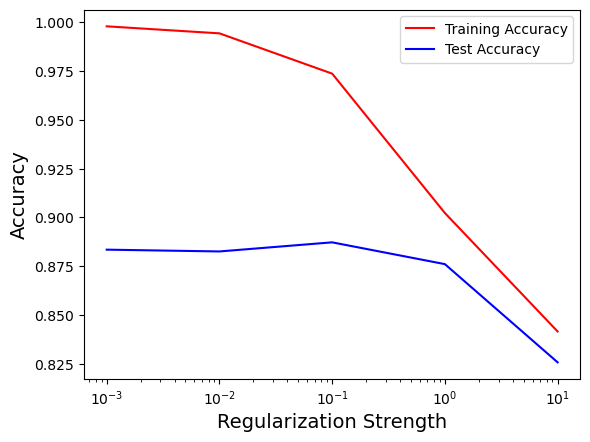

In [21]:
alpha = [0.001, 0.01, 0.1, 1, 10]

fig, axes = plt.subplots()
axes.set_xlabel('Regularization Strength', fontsize=14)
axes.set_ylabel('Accuracy', fontsize=14)

train_acc = []
test_acc = []

for i in alpha:
    print(i)
    mlp = MLPClassifier(random_state=seed, alpha=i, max_iter=1000)
    mlp.fit(X_tr, y_tr)
    train_acc.append(mlp.score(X_tr, y_tr))
    test_acc.append(mlp.score(X_val, y_val))


axes.semilogx(alpha, train_acc, label='Training Accuracy', color='red') 
axes.semilogx(alpha, test_acc, label='Test Accuracy', color='blue')
leg = axes.legend()

0.0005
0.001
0.005
0.01


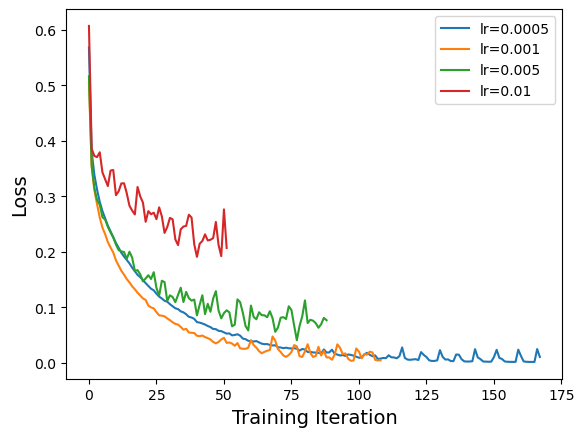

In [20]:
lr = [0.0005, 0.001, 0.005, 0.01]

fig, axes = plt.subplots()
axes.set_xlabel('Training Iteration', fontsize=14)
axes.set_ylabel('Loss', fontsize=14)


for i in lr:
    print(i)
    mlp = MLPClassifier(max_iter=1000, learning_rate_init=i, random_state=seed)
    mlp.fit(X_tr, y_tr)
    plt.plot(mlp.loss_curve_, label=f'lr={i}')
    
leg = axes.legend()


In [4]:
activations = ['relu', 'identity', 'logistic', 'tanh']
print(1)
for x in activations:

    mlp = MLPClassifier(activation=x,
                        random_state=seed, max_iter=200)
    mlp.fit(X_tr, y_tr)
    train_err = mlp.score(X_tr, y_tr)
    test_err = mlp.score(X_val, y_val)
    print(f'Activation: {x}')
    print(f'Training Accuracy: {train_err}')
    print(f'Test Accuracy: {test_err}')

1
Activation: relu
Training Accuracy: 0.9976041666666666
Test Accuracy: 0.8835
Activation: identity
Training Accuracy: 0.8824583333333333
Test Accuracy: 0.8363333333333334
Activation: logistic
Training Accuracy: 1.0
Test Accuracy: 0.8776666666666667
Activation: tanh
Training Accuracy: 1.0
Test Accuracy: 0.87675


100
1000
5000
10000
20000
50000
60000


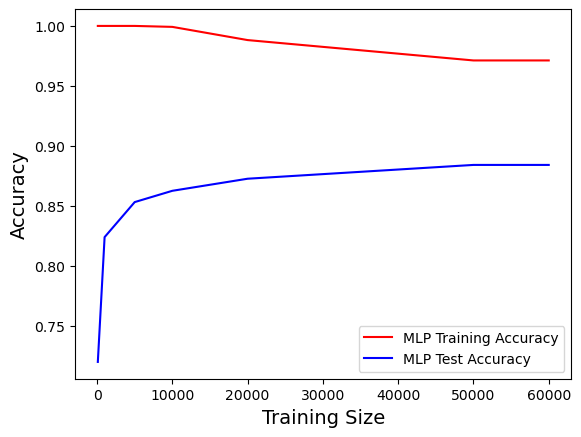

In [23]:
n_tr = [100, 1000, 5000, 10000, 20000, 50000, 60000]

train_acc = []
test_acc = []

for i in n_tr:
    print(i)
    mlp = MLPClassifier(hidden_layer_sizes=(512,), activation='relu', alpha=0.1, 
                        learning_rate_init=0.001, random_state=seed,
                       max_iter=1000)
    mlp.fit(X_tr[0:i], y_tr[0:i])
    train_acc.append(mlp.score(X_tr[0:i], y_tr[0:i]))
    test_acc.append(mlp.score(X_val[0:i], y_val[0:i]))


fig, axes = plt.subplots()
axes.set_xlabel('Training Size', fontsize=14)
axes.set_ylabel('Accuracy', fontsize=14)
axes.plot(n_tr, train_acc, label='MLP Training Accuracy', color='red')
axes.plot(n_tr, test_acc, label='MLP Test Accuracy', color='blue')

leg = axes.legend()

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(512,), activation='relu', alpha=0.1, 
                        learning_rate_init=0.001, random_state=seed,
                       max_iter=1000)
mlp.fit(X_train, y_train)

print(f"Final Test Data Accuracy: {mlp.score(X_test, y_test)}")

Final Test Data Accuracy: 0.8862
